In [1]:
# Set up imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from pathlib import Path
import seaborn as sns
import os

In [2]:
# Import CSV
filepath = "Resources/student_health_data.csv"
dirty_data = pd.read_csv(filepath)

# Check it
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [3]:
dirty_data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [4]:
clean_data = dirty_data

In [5]:
# lets make integers
clean_data["Blood_Pressure_Systolic"] = clean_data["Blood_Pressure_Systolic"].astype("int")
clean_data["Heart_Rate"] = clean_data["Heart_Rate"].astype("int")
clean_data["Blood_Pressure_Diastolic"] = clean_data["Blood_Pressure_Diastolic"].astype("int")
clean_data["Stress_Level_Biosensor"] = clean_data["Stress_Level_Biosensor"].astype("int")
clean_data["Stress_Level_Self_Report"] = clean_data["Stress_Level_Self_Report"].astype("int")
clean_data["Study_Hours"] = clean_data["Study_Hours"].astype("int")
clean_data["Project_Hours"] = clean_data["Project_Hours"].astype("int")
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student_ID                1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Heart_Rate                1000 non-null   int32 
 4   Blood_Pressure_Systolic   1000 non-null   int32 
 5   Blood_Pressure_Diastolic  1000 non-null   int32 
 6   Stress_Level_Biosensor    1000 non-null   int32 
 7   Stress_Level_Self_Report  1000 non-null   int32 
 8   Physical_Activity         1000 non-null   object
 9   Sleep_Quality             1000 non-null   object
 10  Mood                      1000 non-null   object
 11  Study_Hours               1000 non-null   int32 
 12  Project_Hours             1000 non-null   int32 
 13  Health_Risk_Level         1000 non-null   object
dtypes: int32(7), int64(2), ob

In [6]:
clean_data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50,122,84,3,9,High,Moderate,Happy,34,16,Moderate
1,2,21,F,57,110,75,3,5,Moderate,Good,Stressed,16,15,Moderate
2,3,22,M,59,109,83,6,5,Low,Moderate,Happy,44,25,Moderate
3,4,24,M,76,125,78,6,6,High,Poor,Happy,21,20,High
4,5,20,M,68,107,80,7,4,Moderate,Poor,Happy,8,15,Moderate


In [7]:
# Pull a new DF that shows stress-related variables
stress_df = pd.DataFrame({
    "Heart_Rate": clean_data.Heart_Rate,
    "Blood_Pressure_Systolic": clean_data.Blood_Pressure_Systolic,
    "Blood_Pressure_Diastolic": clean_data.Blood_Pressure_Diastolic,
    "Stress_Level_Biosensor": clean_data.Stress_Level_Biosensor,
    "Stress_Level_Self_Report": clean_data.Stress_Level_Self_Report,
    "Sleep_Quality": clean_data.Sleep_Quality,
    "Mood": clean_data.Mood,
    "Study_Hours": clean_data.Study_Hours,
    "Project_Hours": clean_data.Project_Hours,
    "Health_Risk_Level": clean_data.Health_Risk_Level
})

stress_df.head()    

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,50,122,84,3,9,Moderate,Happy,34,16,Moderate
1,57,110,75,3,5,Good,Stressed,16,15,Moderate
2,59,109,83,6,5,Moderate,Happy,44,25,Moderate
3,76,125,78,6,6,Poor,Happy,21,20,High
4,68,107,80,7,4,Poor,Happy,8,15,Moderate


In [8]:
# This cell brought to you by Xpert AI
sleep_mapping = {
    'Poor': 0,
    'Moderate': .5,
    'Good': 1
    }

stress_df.Sleep_Quality = stress_df.Sleep_Quality.map(sleep_mapping)

In [9]:
# This cell brought to you by Xpert AI
health_mapping = {
    'Low': 0,
    'Moderate': .5,
    'High': 1
    }

stress_df.Health_Risk_Level = stress_df.Health_Risk_Level.map(health_mapping)

In [10]:
# This cell brought to you by Xpert AI
mood_mapping = {
    'Stressed': 0,
    'Neutral': .5,
    'Happy': 1
    }

stress_df.Mood = stress_df.Mood.map(mood_mapping)

In [11]:
stress_df.head()

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,50,122,84,3,9,0.5,1.0,34,16,0.5
1,57,110,75,3,5,1.0,0.0,16,15,0.5
2,59,109,83,6,5,0.5,1.0,44,25,0.5
3,76,125,78,6,6,0.0,1.0,21,20,1.0
4,68,107,80,7,4,0.0,1.0,8,15,0.5


In [12]:
# custom pallette instructions for matplotlib from https://www.google.com/search?client=firefox-b-1-d&q=how+to+change+matplotlib+color+palette

colors = ["#2568E4", "#1E80C7", "#1697AA", "#0EAF8D", "#06C670", "#36AA60", "#668E50", "#967240", "#C55530"]
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', colors)

In [13]:
# custom pallette instructions for seaborn from https://www.google.com/search?client=firefox-b-1-d&q=seaborn+set+color+palette

# make palette
custom_palette = ["#2568E4", "#1E80C7", "#1697AA", "#0EAF8D", "#06C670", "#36AA60", "#668E50", "#967240", "#C55530"]
# Set the palette
sns.set_palette(custom_palette)

In [14]:
Royal_Blue = "#2568E4"
Steel_Blue = "#1E80C7"
Blue_Munsell = "#1697AA"
Jungle_Green = "#0EAF8D"
Emerald = "#06C670"
Pigment_Green = "#36AA60"
Asparagus = "#668E50"
Golden_Brown = "#967240"
Sinopia = "#C55530"

In [15]:
# This cell brought to you by Xpert AI

# Create the output directory if it doesn't exist
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

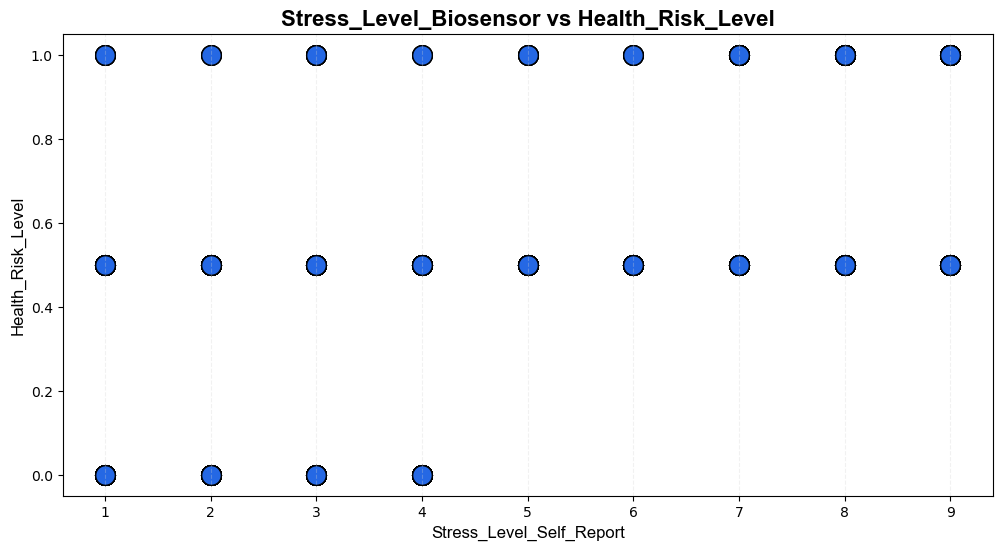

In [16]:
# make a scatter plot
x = stress_df.Stress_Level_Biosensor
y = stress_df.Health_Risk_Level
x_label = "Stress_Level_Biosensor"
y_label = "Health_Risk_Level"
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(x, y, edgecolor="black", s=200)

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Stress_Level_Self_Report", fontfamily="Arial", fontsize=12)
plt.ylabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
title = f"{x_label} vs {y_label}"
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.3)

# Save the figure
plt.savefig(os.path.join(output_dir, title))

# Show plot
plt.show()

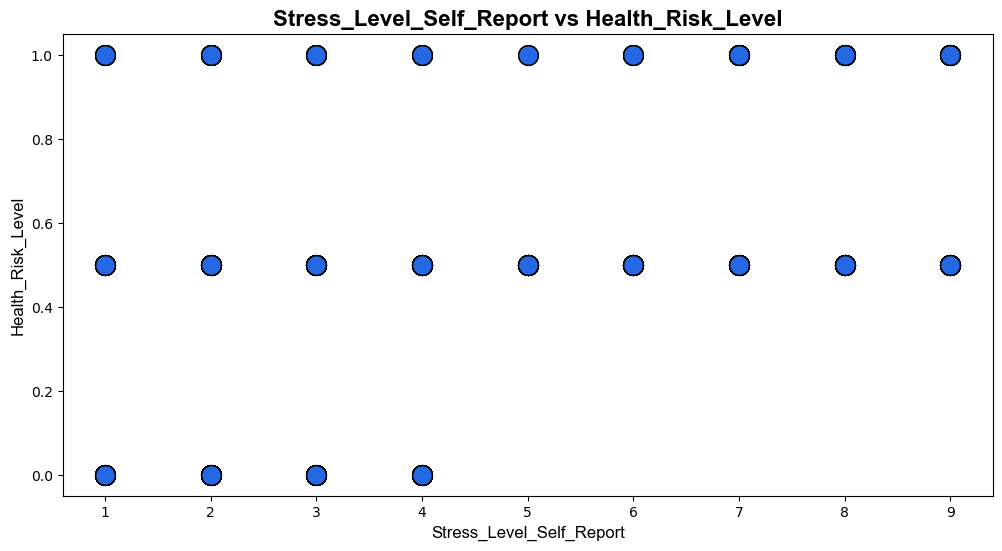

In [17]:
# make a scatter plot
x = stress_df.Stress_Level_Self_Report
y = stress_df.Health_Risk_Level
x_label = "Stress_Level_Self_Report"
y_label = "Health_Risk_Level"
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(x, y, edgecolor="black", s=200)

# Invert the y-axis
#plt.gca().invert_yaxis() # Thanks Xpert

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Stress_Level_Self_Report", fontfamily="Arial", fontsize=12)
plt.ylabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

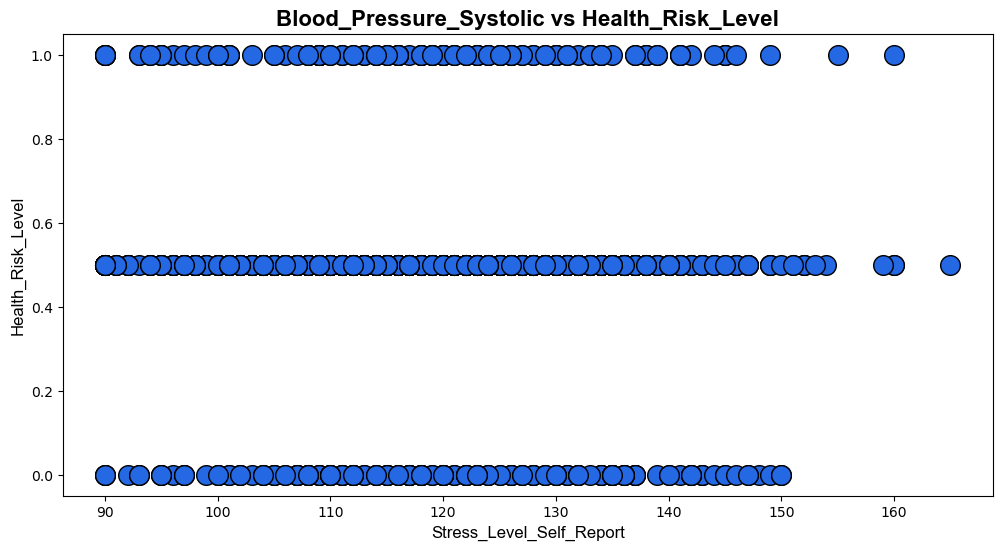

In [18]:
# make a scatter plot
x = stress_df.Blood_Pressure_Systolic
y = stress_df.Health_Risk_Level
x_label = "Blood_Pressure_Systolic"
y_label = "Health_Risk_Level"
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(x, y, edgecolor="black", s=200)

# Invert the y-axis
#plt.gca().invert_yaxis() # Thanks Xpert

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Stress_Level_Self_Report", fontfamily="Arial", fontsize=12)
plt.ylabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

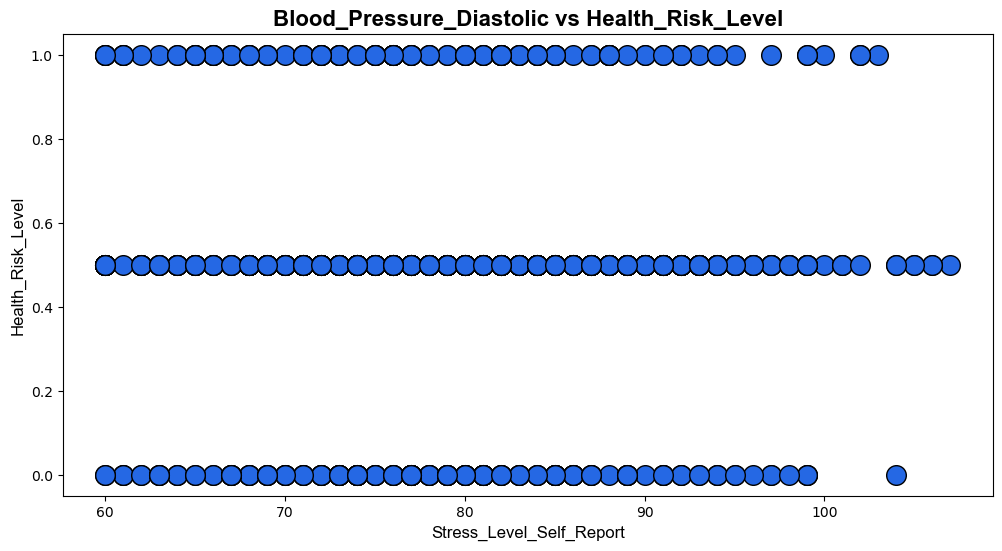

In [19]:
# make a scatter plot
x = stress_df.Blood_Pressure_Diastolic
y = stress_df.Health_Risk_Level
x_label = "Blood_Pressure_Diastolic"
y_label = "Health_Risk_Level"
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(x, y, edgecolor="black", s=200)

# Invert the y-axis
#plt.gca().invert_yaxis() # Thanks Xpert

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Stress_Level_Self_Report", fontfamily="Arial", fontsize=12)
plt.ylabel("Health_Risk_Level", fontfamily="Arial", fontsize=12)
title = f"{x_label} vs {y_label}"
plt.title(title, fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
plt.savefig(os.path.join(output_dir, title))

# Show plot
plt.show()


In [20]:
# Define a function to create Linear Regression plots
def do_regression_plot(x, y, x_label, y_label, annotation, color):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"rvalue = {rvalue}")
    print(line_eq)

    # make a scatter plot

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x, y, color={color}, edgecolor="black", s=200)
    plt.plot(x, regress_values, color="black", linewidth=6) # the regression line
    
    # Incorporate the other graph properties
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    title = f"{x_label} vs {y_label}"
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")

    # Save the figure
    plt.savefig(os.path.join(output_dir, title))
    
    # Show plot
    plt.show()

In [21]:
stress_df.head()

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,50,122,84,3,9,0.5,1.0,34,16,0.5
1,57,110,75,3,5,1.0,0.0,16,15,0.5
2,59,109,83,6,5,0.5,1.0,44,25,0.5
3,76,125,78,6,6,0.0,1.0,21,20,1.0
4,68,107,80,7,4,0.0,1.0,8,15,0.5


rvalue = -0.031313827080894543
y = -0.0x + 0.54


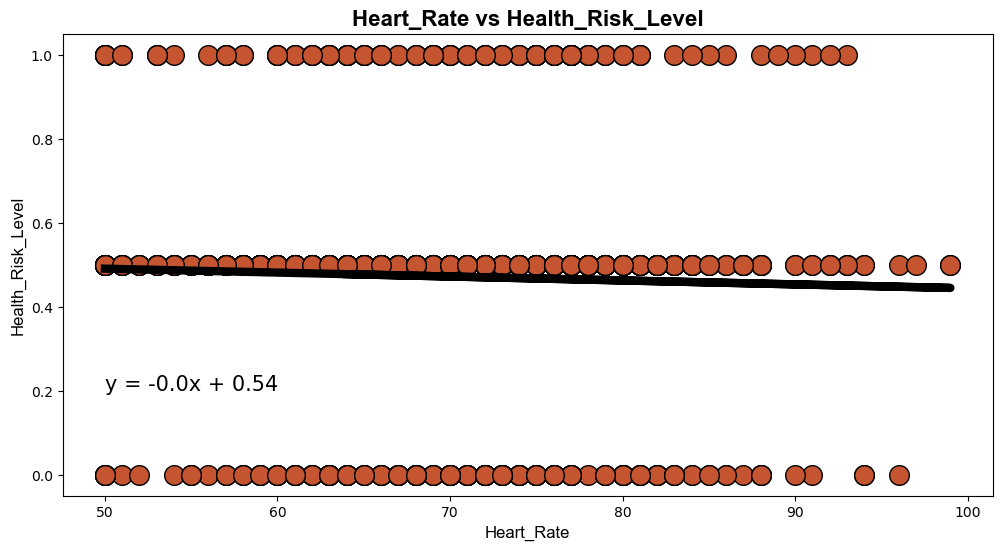

In [22]:
x = stress_df.Heart_Rate
y = stress_df.Health_Risk_Level
x_label = "Heart_Rate"
y_label = "Health_Risk_Level"
annotation = (50, 0.2)
color = Sinopia


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.025404459418086965
y = -0.0x + 0.53


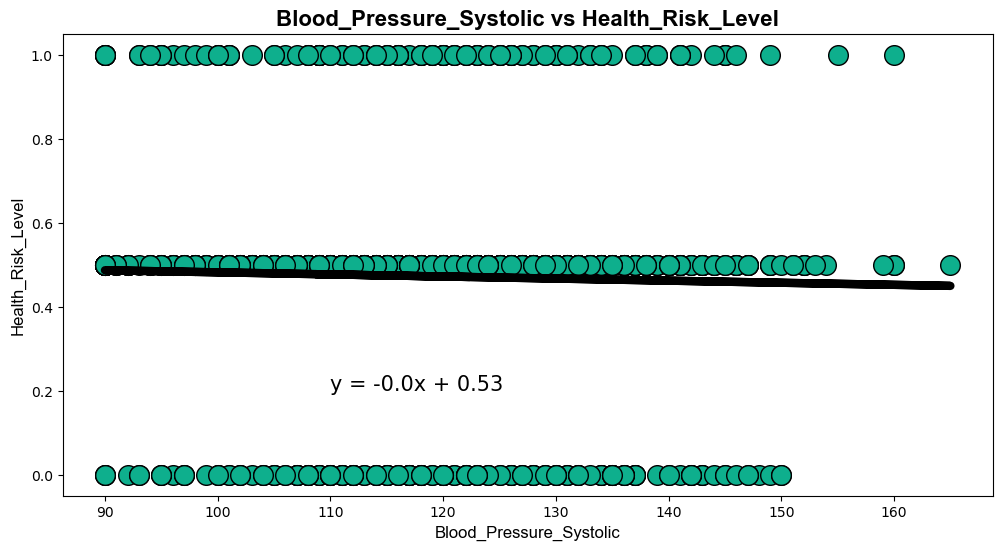

In [23]:
x = stress_df.Blood_Pressure_Systolic
y = stress_df.Health_Risk_Level
x_label = "Blood_Pressure_Systolic"
y_label = "Health_Risk_Level"
annotation = (110, 0.2)
color = Jungle_Green


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.006683346835588125
y = -0.0x + 0.49


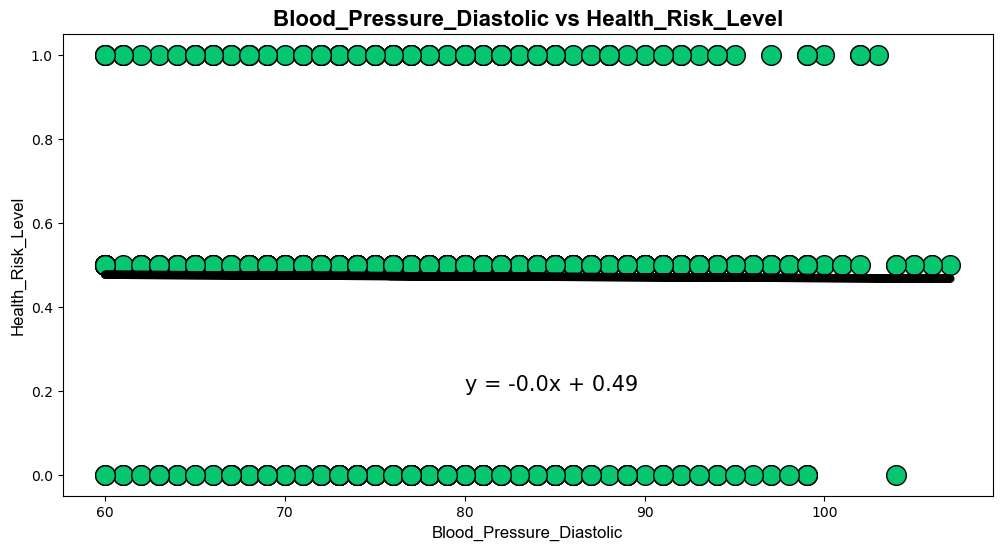

In [24]:
x = stress_df.Blood_Pressure_Diastolic
y = stress_df.Health_Risk_Level
x_label = "Blood_Pressure_Diastolic"
y_label = "Health_Risk_Level"
annotation = (80, 0.2)
color = Emerald


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = 0.5120263162631223
y = 0.06x + 0.19


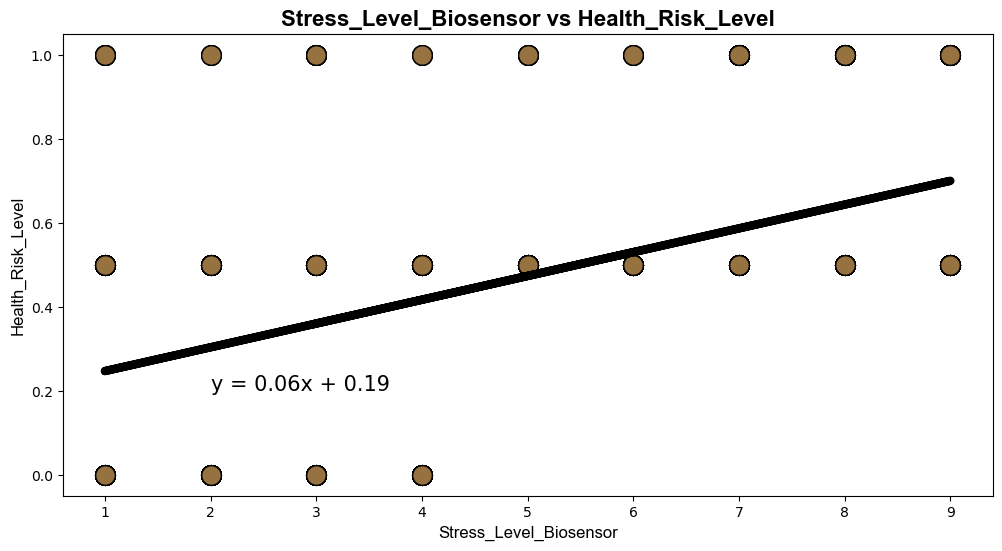

In [25]:
x = stress_df.Stress_Level_Biosensor
y = stress_df.Health_Risk_Level
x_label = "Stress_Level_Biosensor"
y_label = "Health_Risk_Level"
annotation = (2, 0.2)
color = Golden_Brown


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = 0.4906213828483617
y = 0.06x + 0.21


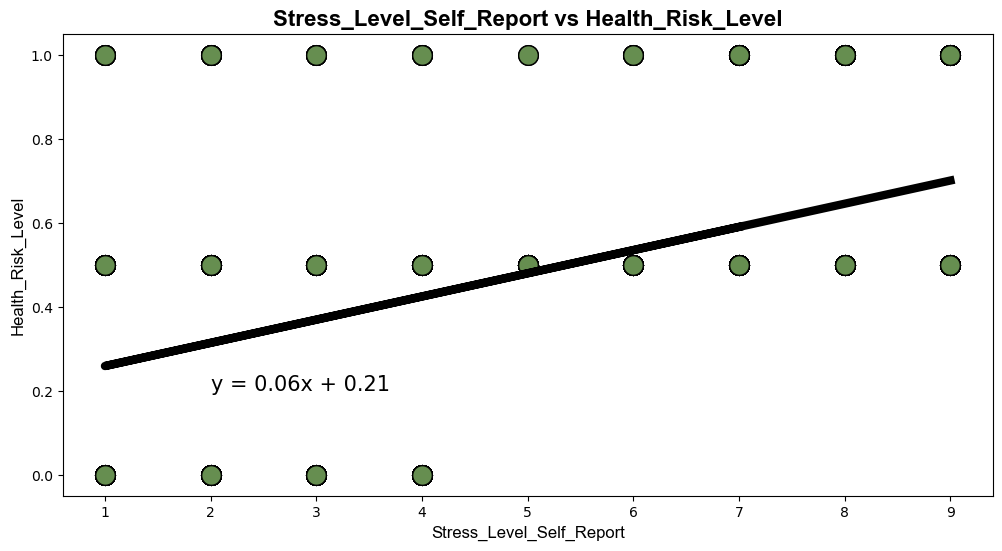

In [26]:
x = stress_df.Stress_Level_Self_Report
y = stress_df.Health_Risk_Level
x_label = "Stress_Level_Self_Report"
y_label = "Health_Risk_Level"
annotation = (2, 0.2)
color = Asparagus


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.1618522224403182
y = -0.12x + 0.55


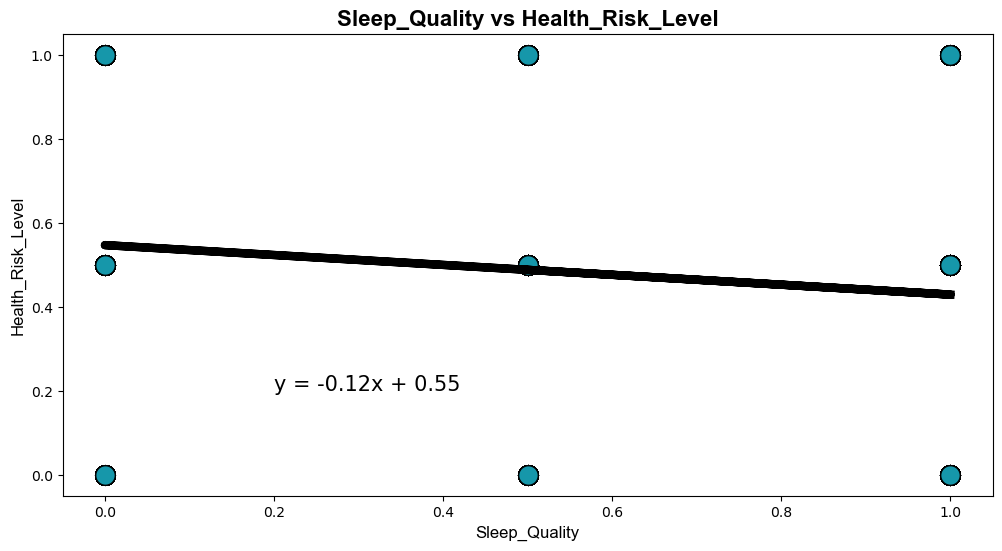

In [27]:
x = stress_df.Sleep_Quality
y = stress_df.Health_Risk_Level
x_label = "Sleep_Quality"
y_label = "Health_Risk_Level"
annotation = (0.2, 0.2)
color = Blue_Munsell


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = 0.03598307897669257
y = 0.03x + 0.46


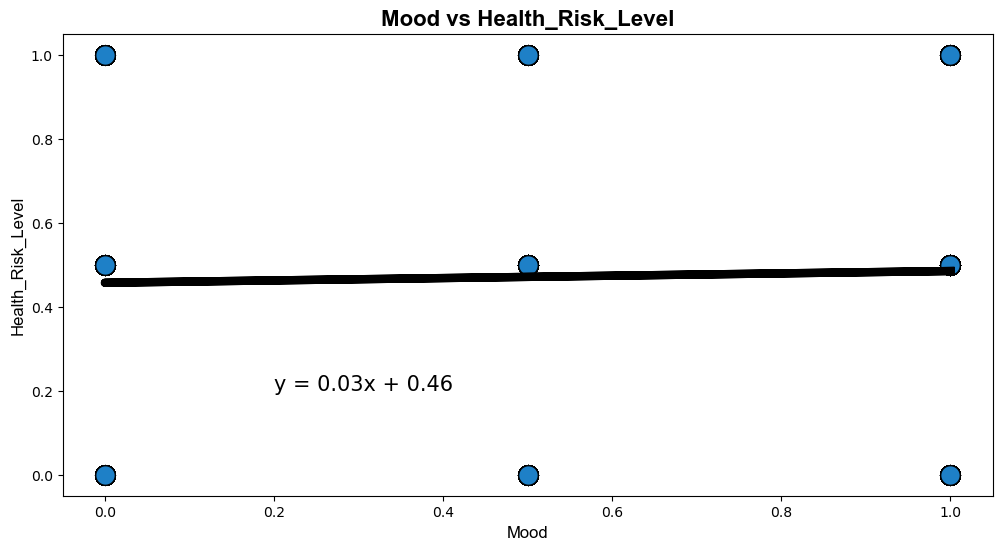

In [28]:
x = stress_df.Mood
y = stress_df.Health_Risk_Level
x_label = "Mood"
y_label = "Health_Risk_Level"
annotation = (0.2, 0.2)
color = Steel_Blue


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = -0.02966943612269532
y = -0.0x + 0.5


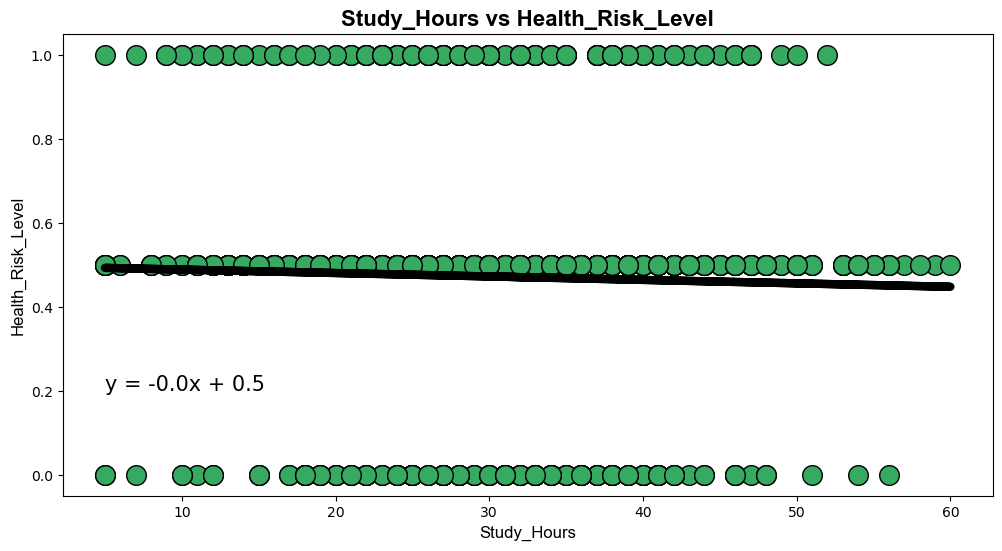

In [29]:
x = stress_df.Study_Hours
y = stress_df.Health_Risk_Level
x_label = "Study_Hours"
y_label = "Health_Risk_Level"
annotation = (5, 0.2)
color = Pigment_Green


do_regression_plot(x, y, x_label, y_label, annotation, color)

rvalue = 0.017931163456678764
y = 0.0x + 0.46


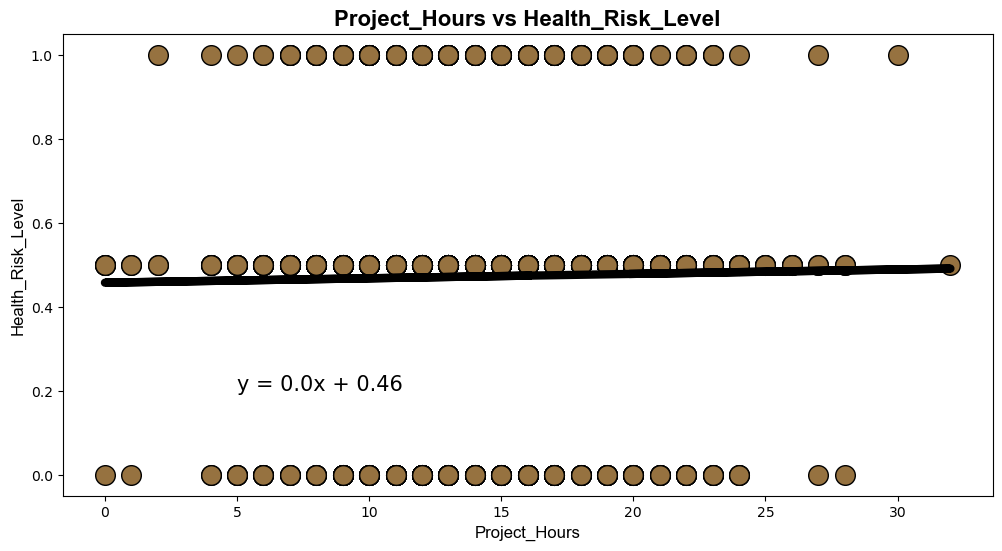

In [30]:
x = stress_df.Project_Hours
y = stress_df.Health_Risk_Level
x_label = "Project_Hours"
y_label = "Health_Risk_Level"
annotation = (5, 0.2)
color = Golden_Brown


do_regression_plot(x, y, x_label, y_label, annotation, color)

In [31]:
corrs = stress_df.corr()
corrs

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
Heart_Rate,1.000000,0.009420,-0.031020,0.045132,-0.033309,0.012022,0.007748,0.041788,0.002358,-0.031314
Blood_Pressure_Systolic,0.009420,1.000000,0.020659,-0.029478,-0.023830,0.020110,0.050464,-0.003957,-0.030489,-0.025404
Blood_Pressure_Diastolic,-0.031020,0.020659,1.000000,0.000470,-0.013017,0.009334,-0.005940,-0.010000,-0.025830,-0.006683
Stress_Level_Biosensor,0.045132,-0.029478,0.000470,1.000000,-0.024852,0.035506,0.000968,-0.035922,0.001183,0.512026
Stress_Level_Self_Report,-0.033309,-0.023830,-0.013017,-0.024852,1.000000,-0.030232,0.025425,-0.004136,0.025383,0.490621
Sleep_Quality,0.012022,0.020110,0.009334,0.035506,-0.030232,1.000000,-0.026096,-0.017091,0.058910,-0.161852
Mood,0.007748,0.050464,-0.005940,0.000968,0.025425,-0.026096,1.000000,0.023519,0.052273,0.035983
Study_Hours,0.041788,-0.003957,-0.010000,-0.035922,-0.004136,-0.017091,0.023519,1.000000,-0.039465,-0.029669
Project_Hours,0.002358,-0.030489,-0.025830,0.001183,0.025383,0.058910,0.052273,-0.039465,1.000000,0.017931
Health_Risk_Level,-0.031314,-0.025404,-0.006683,0.512026,0.490621,-0.161852,0.035983,-0.029669,0.017931,1.000000


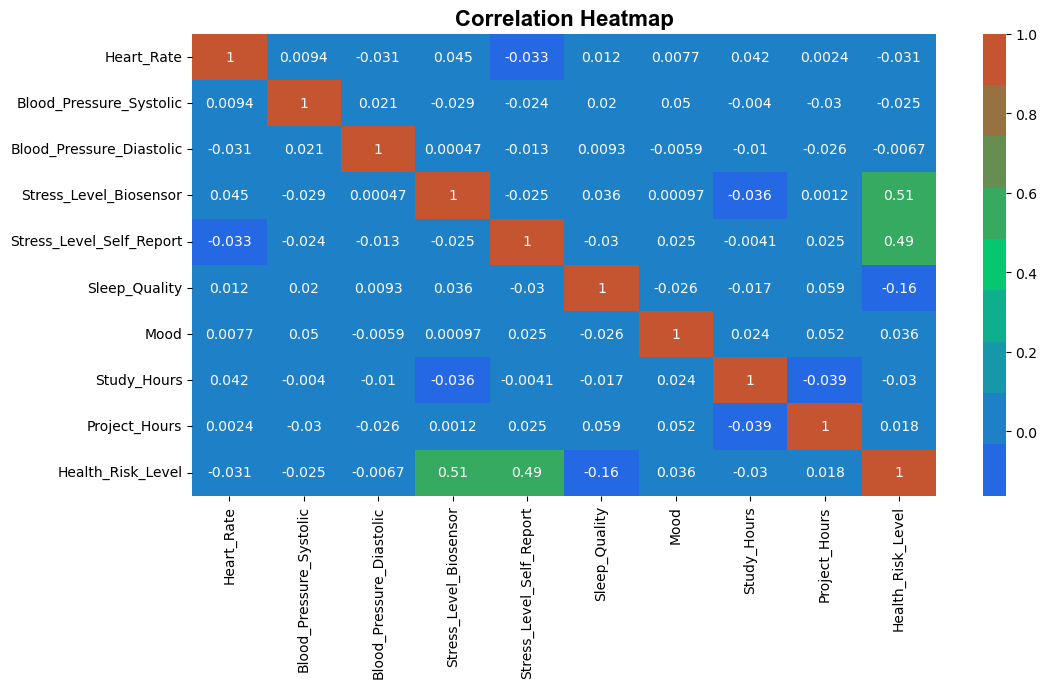

In [32]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# make palette
#custom_palette = ["#2568E4", "#1E80C7", "#1697AA", "#0EAF8D", "#06C670", "#36AA60", "#668E50", "#967240", "#C55530"]
# Set the palette
#sns.set_palette(custom_palette)
# Create a basic plot
sns.heatmap(corrs, annot=True, cmap = custom_palette)
# Customization
plt.title("Correlation Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.savefig(os.path.join(output_dir, "stress_heatmap"))
plt.show()

rvalue = -0.02485180197909724
y = -0.02x + 4.99


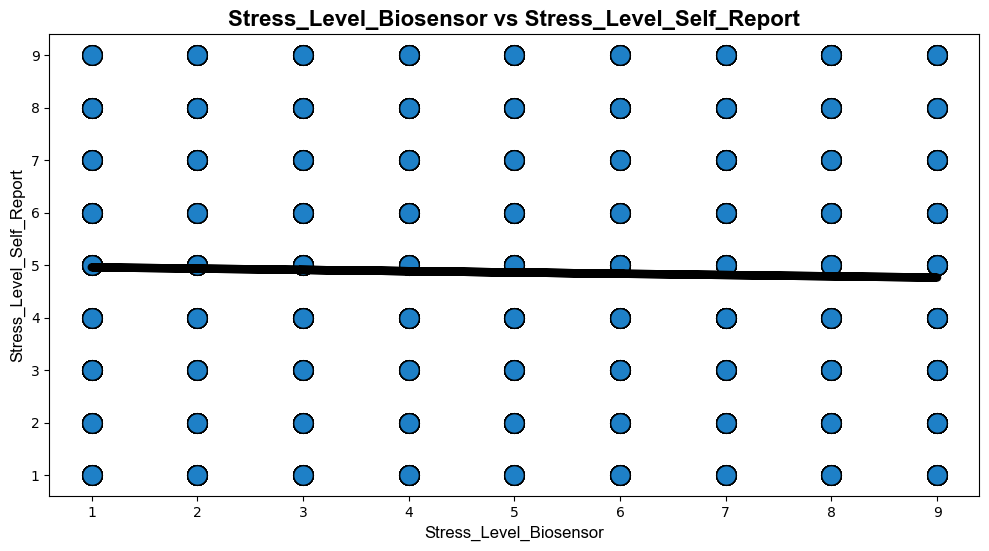

In [33]:
x = stress_df.Stress_Level_Biosensor
y = stress_df.Stress_Level_Self_Report
x_label = "Stress_Level_Biosensor"
y_label = "Stress_Level_Self_Report"
annotation = (0.2, 0.2)
color = Steel_Blue


do_regression_plot(x, y, x_label, y_label, annotation, color)

## Discussion: 

#### The only strong correlation this data suggests is between stress level and health risk level. Self reported stress levels and biosensor stress levels were very close, which means that self-reports were relatively accurate. Subjects with higher biosensor stress levels had a slight tendency to self report lower stress levels. This data suggests that higher stress leads to an increased Health Risk Level and that people experiencing high stress tend to understimate the amount of stress they experience. 